### Import Necessary Libraries

In [41]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

### Load Data

In [42]:
df = pd.read_csv('./transformed_data.csv')
df.head(10)

,CODE,COUNTRY,DATE,HDI,TC,TD,STI,POP,GDPCAP
0,AFG,Afghanistan,2019-12-31,0.498,0.0,0.0,0.0,17.477233,7.497754
1,AFG,Afghanistan,2020-01-01,0.498,0.0,0.0,0.0,17.477233,7.497754
2,AFG,Afghanistan,2020-01-02,0.498,0.0,0.0,0.0,17.477233,7.497754
3,AFG,Afghanistan,2020-01-03,0.498,0.0,0.0,0.0,17.477233,7.497754
4,AFG,Afghanistan,2020-01-04,0.498,0.0,0.0,0.0,17.477233,7.497754
5,AFG,Afghanistan,2020-01-05,0.498,0.0,0.0,0.0,17.477233,7.497754
6,AFG,Afghanistan,2020-01-06,0.498,0.0,0.0,0.0,17.477233,7.497754
7,AFG,Afghanistan,2020-01-07,0.498,0.0,0.0,0.0,17.477233,7.497754
8,AFG,Afghanistan,2020-01-08,0.498,0.0,0.0,0.0,17.477233,7.497754
9,AFG,Afghanistan,2020-01-09,0.498,0.0,0.0,0.0,17.477233,7.497754


### Data Pre-processing

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50418 entries, 0 to 50417
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CODE     50418 non-null  object 
 1   COUNTRY  50418 non-null  object 
 2   DATE     50418 non-null  object 
 3   HDI      44216 non-null  float64
 4   TC       50418 non-null  float64
 5   TD       50418 non-null  float64
 6   STI      50418 non-null  float64
 7   POP      50418 non-null  float64
 8   GDPCAP   50418 non-null  float64
dtypes: float64(6), object(3)
memory usage: 3.5+ MB


In [44]:
df.describe()

,HDI,TC,TD,STI,POP,GDPCAP
count,44216.000000,50418.000000,50418.000000,50418.000000,50418.000000,50418.000000
mean,0.720139,6.762125,3.413681,3.178897,15.442097,8.318580
std,0.160902,3.637347,3.082761,1.673451,2.495039,3.177130
min,0.000000,0.000000,0.000000,0.000000,6.695799,0.000000
25%,0.601000,4.158883,0.000000,2.867331,14.151619,7.955479
50%,0.752000,7.092574,3.178054,4.000583,15.929201,9.368531
75%,0.847000,9.504669,5.620401,4.335852,17.187513,10.237704
max,0.953000,15.914092,12.299900,4.605170,21.087439,11.669379


In [45]:
df.isnull().sum()

CODE          0
COUNTRY       0
DATE          0
HDI        6202
TC            0
TD            0
STI           0
POP           0
GDPCAP        0
dtype: int64

In [46]:
df = df.interpolate(method='linear', limit_direction='forward')
print(df)

      CODE      COUNTRY        DATE    HDI        TC        TD       STI  \
0      AFG  Afghanistan  2019-12-31  0.498  0.000000  0.000000  0.000000   
1      AFG  Afghanistan  2020-01-01  0.498  0.000000  0.000000  0.000000   
2      AFG  Afghanistan  2020-01-02  0.498  0.000000  0.000000  0.000000   
3      AFG  Afghanistan  2020-01-03  0.498  0.000000  0.000000  0.000000   
4      AFG  Afghanistan  2020-01-04  0.498  0.000000  0.000000  0.000000   
...    ...          ...         ...    ...       ...       ...       ...   
50413  ZWE     Zimbabwe  2020-10-15  0.535  8.994048  5.442418  4.341855   
50414  ZWE     Zimbabwe  2020-10-16  0.535  8.996528  5.442418  4.341855   
50415  ZWE     Zimbabwe  2020-10-17  0.535  8.999496  5.442418  4.341855   
50416  ZWE     Zimbabwe  2020-10-18  0.535  9.000853  5.442418  4.341855   
50417  ZWE     Zimbabwe  2020-10-19  0.535  9.005405  5.442418  4.341855   

             POP    GDPCAP  
0      17.477233  7.497754  
1      17.477233  7.497754  


In [47]:
df.isnull().sum()

CODE       0
COUNTRY    0
DATE       0
HDI        0
TC         0
TD         0
STI        0
POP        0
GDPCAP     0
dtype: int64

In [48]:
df.shape

(50418, 9)

In [49]:
df = df[~df.index.duplicated()]

### EDA

array([[<Axes: title={'center': 'TC'}>, <Axes: title={'center': 'TD'}>],
       [<Axes: title={'center': 'HDI'}>, <Axes: title={'center': 'POP'}>],
       [<Axes: title={'center': 'GDPCAP'}>, <Axes: >]], dtype=object)

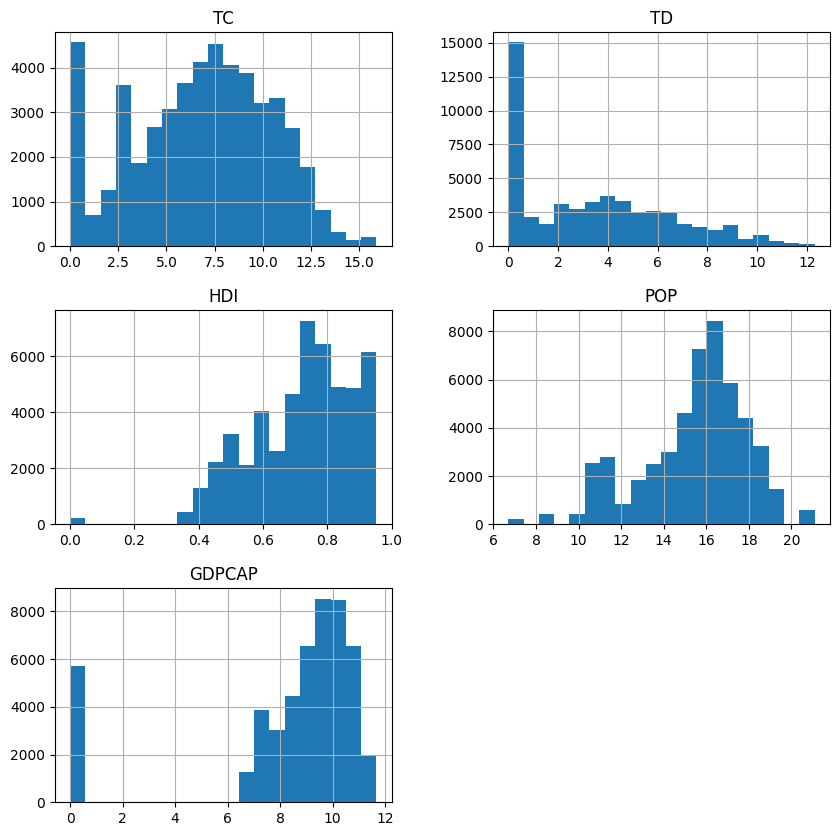

In [55]:
df.hist(column=['TC', 'TD', 'HDI', 'POP', 'GDPCAP'], bins=20, figsize=(10,10), layout=(3,2))

<Axes: >

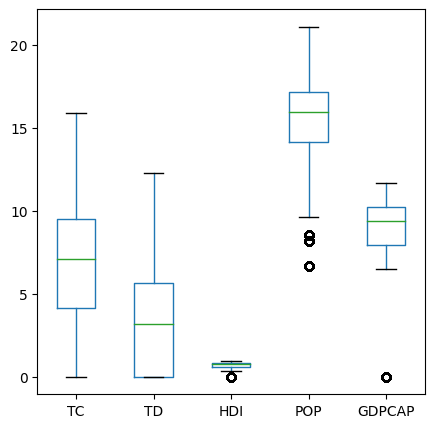

In [56]:
df.boxplot(column=['TC', 'TD', 'HDI', 'POP', 'GDPCAP'], grid=False, figsize=(5,5))

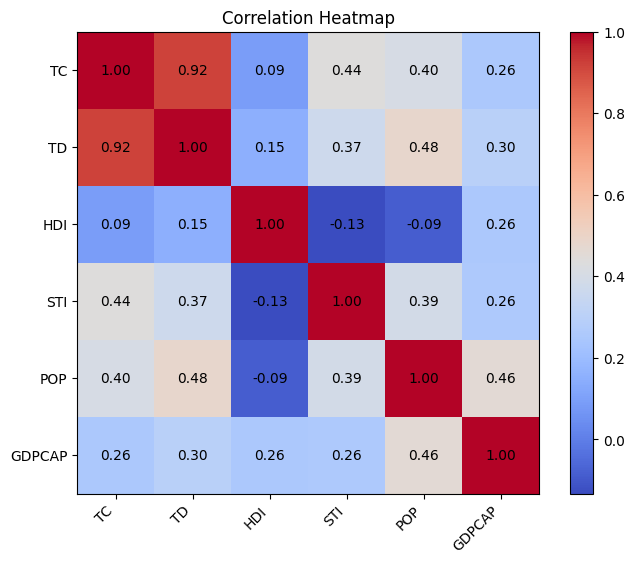

In [65]:
# Create a correlation matrix for selected columns
columns = ['TC', 'TD', 'HDI', 'STI', 'POP', 'GDPCAP']
corr_matrix = df[columns].corr()

# Create a heatmap
fig, ax = plt.subplots(figsize=(8, 6))
heatmap = ax.imshow(corr_matrix, cmap='coolwarm')

# Set axis labels
ax.set_xticks(np.arange(len(columns)))
ax.set_yticks(np.arange(len(columns)))
ax.set_xticklabels(columns)
ax.set_yticklabels(columns)

# Rotate x-axis labels
plt.setp(ax.get_xticklabels(), rotation=45, ha='right')

# Add colorbar
cbar = plt.colorbar(heatmap)

# Add correlation values in the heatmap cells
for i in range(len(columns)):
    for j in range(len(columns)):
        text = ax.text(j, i, f"{corr_matrix.iloc[i, j]:.2f}",
                       ha='center', va='center', color='black')

# Set title
ax.set_title('Correlation Heatmap')

# Display the heatmap
plt.show()